<a href="https://colab.research.google.com/github/ClimateAI/ClimateAIInterview/blob/master/ClimateAi_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome

Thank you very much for participating in the data science challenge for the ClimateAi interview.  We greatly appreciate the time that you put into working on this challenge, and we sincerely look forward to going over the results of the challenge with you.  We anticipate that this challenge will take a total of 6-8 hours, and we thank you very much for your preparation!

We hope you enjoy working on a very relevant, exciting problem in machine learning for climate science: seasonal forecasting!  

Please email Max Evans if you have any questions about the challenge: max@climate.ai

# Background

*Seasonal forecasting* is the task of issuing a forecast of monthly average temperatures.    An example of seasonal forecasting is: 

*  what will be the average temperature for the month of February 2020, given the average temperature for the month of January 2020? What is the average temperature of March 2020, given the temperature in February 2020? And so on, for each month of each year in the dataset.

In this exercise, we will be exploring seasonal forecasting with machine learning (ML). 


*Lead time:* the number of months between the input to the machine learning model and the target of the machine learning model.  In the above example, the lead time was 1 month.  If the lead time is 3 months, then the input to the model would be January, and the target would be April, and so on for each month of each year.

*El Niño* is a climate oscillation that is a cycle of warm and cold temperatures in the equatorial Pacific Ocean.   It has important implications for seasonal weather patterns all around the world, and it is a dominant cycle that affects seasonal temperature variability.  

*Niño3.4 Index*: the Nino3.4 index is an indicator of the state of the climate in the El Niño oscillation. (If the index is positive, the climate is in the warm phase; if the index is negative, the climate is in the cold phase.) It is defined as the five-month running mean of the average temperature anomaly in the region bounded by 5°N to 5°S and 170°W to 120°W.  [More info about El Nino and this index](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/)

*Temperature anomalies*: often in climate science, a location's temperature is not measured by an absolute magnitude.  Rather, it is measured by the difference between the absolute temperature and the mean temperature at that location.  This is called a temperature anomaly.  Please read this [link](https://www.ncdc.noaa.gov/monitoring-references/dyk/anomalies-vs-temperature) to see why anomalies are used in climate science

Please click this [link](https://drive.google.com/file/d/1eVYDOIWa5J9fqTla0wyxxEErHhXOncom/view) to see an overview slide of this project!!

# The Interview Task

In this exercise, please train machine learning models to forecast the **Niño3.4 index** and the monthly average temperatures of **Akron**, Ohio; **Mexico City**, Mexico; and **Caracas**, Venezuela.  

**Please explore lead times of 1 month, 3 months, and 5 months**


*   You are welcome to use any ML model or ensemble of ML models you like
*   You can train your models to output all four  locations’ temperature simultaneously, or you can train a unique set of models for each location. It is your choice!


## Data

### Predictors for the Machine Learning Model

Global temperature data: the globe is divided into a 1 degree x 1 degree grid, so the dimensions of the data at each timestep are (180, 360).  

We provide three sources of global temperature anomaly data: 

1.   Observed sea surface temperature (SST) anomalies ([download](https://drive.google.com/file/d/1SG1vl59lgvSmjdW2hwK9-BMD4hbk_dSm/view?usp=sharing))

    * This dataset is of temperature at the oceans’ surface (the land values are NaN)
    * This data is from the "Cobe SST" dataset ([website](https://psl.noaa.gov/data/gridded/data.cobe.html))
    * In the dataset, the name of the data is `sst` (see below)
2.    Observed 2m temperature anomalies ( [download](https://drive.google.com/file/d/17lypmWeI2WpYZxApOYTA9FXkFJj73nj-/view?usp=sharing)): 
    * This dataset is of temperature at 2m above the surface, and it has full global coverage (land and ocean)
    * This data is from the ERA5 reanalysis dataset
    * In the dataset, the name of the data is `t2m` (see below)
3. Climate model data: surface temperature anomalies ([download](https://drive.google.com/file/d/18rWXYIIDm0cUj8ixdq7j_9sfxyxFoPza/view?usp=sharing))
    * Climate model data is the output of a computer model that simulates the behavior of the climate under various conditions.  This model was simulated under the "preindustrial control" condition, meaning that it does not assume any anthropogenic emissions.  The benefit of preindustrial control runs is that they are often very long (hundreds of years of simulations), providing a large source of training data.  However, these simulations are not able to capture any effects of anthropogenic emissions.  
    * This dataset from a climate model’s preindustrial control run (the climate model is from a French meteorological center: CNRM).
     In the dataset, the name of the data is `tas` (see below) (tas = temperature at surface)

**For each of the above datasets, please click the download link, press the "folder+" icon at the top right corner of the screen, and add them to your google drive.**. Then, see below for an example of loading predictors and be sure to raed the comment marked "Data quirk."

In [ ]:
#this is a required package for using xarray to open netcdf files
!pip install netCDF4 
!pip install nc-time-axis

Run the following code cell below and authorize Colab to access your Google drive data, where the datasets are stored after you added the files to Google Drive.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import xarray as xr
from matplotlib import pyplot as plt

In [ ]:
#Predictor dataset #1: Observed SST anomalies
sst_anomalies = xr.open_dataset("gdrive/My Drive/sst.mon.mean.trefadj.anom.1880to2018.nc")
sst_anomalies #the sst_anomalies are an xarray.DataArray of shape (180, 360, time)
#This dataset has coverage from 1880(!) to 2018

#DATA QUIRK: sst_anomalies have monthly temperature defined at the 16th of each
#month

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1668)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-16T12:00:00 ... 2018-12-16T12:00:00
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    CDI:              Climate Data Interface version 1.9.6 (http://mpimet.mpg...
    history:          Sun Jun 23 18:30:46 2019: cdo selyear,1880/2018 sst.mon...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    title:            created 12/2013 from data provided by JRA
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    References:       http://www.esrl.noaa.gov/psd/data/gridded/cobe2.html
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    CDO:              Climate Data Operators version 1.9.6 (http://mpimet.mpg...

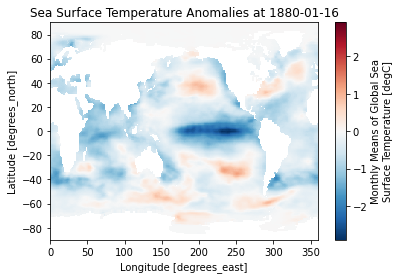

In [ ]:
time_step = "1880-01-16" #in this dataset
sst_anomalies.sel(time=time_step)['sst'].plot()
plt.title("Sea Surface Temperature Anomalies at {}".format(time_step))
plt.show() #notice that there is no coverage over land

In [ ]:
#Predictor dataset #2: Observed 2m temperature anomalies
t2m_anomalies = xr.open_dataset("gdrive/My Drive/regridded_era_t2m_anomalies.nc")
t2m_anomalies #the t2m anomalies are an xarray.DataArray of shape (180, 360, time)


#DATA QUIRK: t2m_anomalies have monthly temperature defined at the 1st of each
#month

#ignore the expver field: it corresponds to experiment version from the creators
#of the ERA5 dataset

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 497)
Coordinates:
    expver   int32 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-05-01
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
    month    (time) int64 ...
Data variables:
    t2m      (time, lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

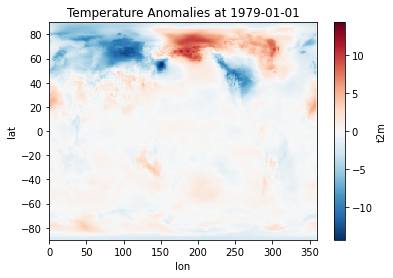

In [ ]:
first_time = "1979-01-01"
temperature_at_first_time = t2m_anomalies['t2m'].sel(time=first_time).plot()
plt.title("Temperature Anomalies at {}".format(first_time))
plt.show()

In [ ]:
cnrm_tas_anomalies = xr.open_dataset("gdrive/My Drive/CNRM_tas_anomalies_regridded.nc")
cnrm_tas_anomalies #CNRM has coverage from 1850 to 2699!
#2699 is so far into the future that you will receive a serialization warning
#A date that far ahead is not supported by np.datetime64 objects
#Therefore, the package uses cftime datetimes, which are designed to support
#dates farther in the future

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 10200)
Coordinates:
  * time     (time) object 1850-01-01 00:00:00 ... 2699-12-01 00:00:00
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
Data variables:
    tas      (time, lat, lon) float64 ...

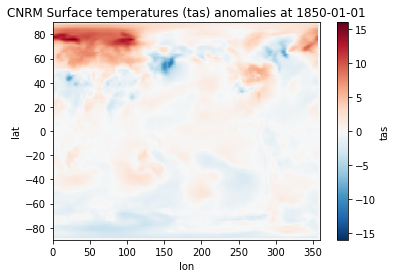

In [ ]:
cnrm_tas_anomalies.sel(time="1850-01-01")['tas'].plot()
plt.title("CNRM Surface temperatures (tas) anomalies at 1850-01-01")
plt.show()

### Targets for the Machine Learning model:

The targets for the machine learning model are:

When training on observed data (datasets 1 and 2: SST and 2m temperature), the targets are

*   2m temperature anomaly time series at Mexico City
*   2m temperature anomaly time series at Caracas
*   2m temperature anomaly time series at Akron, Ohio
*   Nino3.4 Indices (calculated from sea surface temperatures)

When training on predictors from climate model data (dataset 3), the targets should also be from the climate model data.

(Why?: Please note that the climate model has no relationship with observations!  It is purely synthetic, simulated data, so the year 2000 in the climate model is completely different from the year 2000 in the observation datasets.) 


**Please validate your final model(s) on the years 2010-2018.  For Mexico City, Akron, and Caracas, please evaluate your data on 2m temperature anomalies.  For Nino3.4 index, please validate your model on SST data.**



See the code cell below for how to extract the time series of the targets

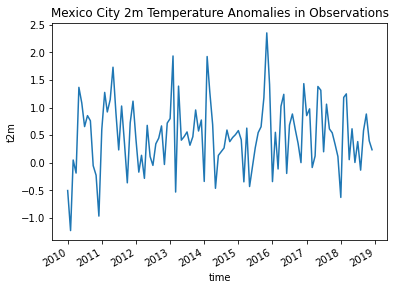

In [ ]:
#Mexico City = CDMX
#longitude is defined from 0 to 360, so 99.1332 degrees West has the 
#longitude 360-99.1332 
cdmx_lat, cdmx_lon = 19.4326, 360-99.1332
akron_lat, akron_lon = 41.0814, 360-81.5190
caracas_lat, caracas_lon = 10.4806, 360-66.9036

cdmx_targets_t2m = t2m_anomalies.sel(lat=cdmx_lat, lon=cdmx_lon,  method='nearest')
akron_targets_t2m = t2m_anomalies.sel(lat=akron_lat, lon=akron_lon,  method='nearest')
caracas_targets_t2m = t2m_anomalies.sel(lat=caracas_lat, lon=caracas_lon,  method='nearest')


#Plot the time series of 2010-2017 cdmx temperature
cdmx_targets_t2m['t2m'].sel(time=slice("2010-01-01", "2018-12-31")).plot()
plt.title("Mexico City 2m Temperature Anomalies in Observations")
plt.show()

If you wish to train on the climate model, you can similarly select data from the climate model and use that as the targets for the predictors from the climate model.  Please note how below, the year 2010-2017 in the climate model is different from observations!

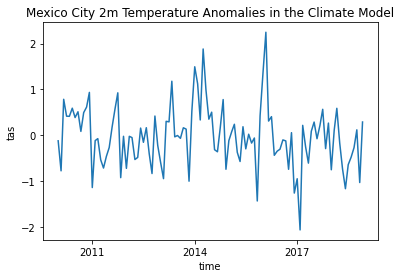

In [ ]:

cdmx_targets_cnrm = cnrm_tas_anomalies.sel(lat=cdmx_lat, lon=cdmx_lon,  method='nearest')
#Plot the time series of 2010-2017 cdmx temperature
cdmx_targets_cnrm['tas'].sel(time=slice("2010-01-01", "2018-12-31")).plot()
plt.title("Mexico City 2m Temperature Anomalies in the Climate Model")
plt.show()

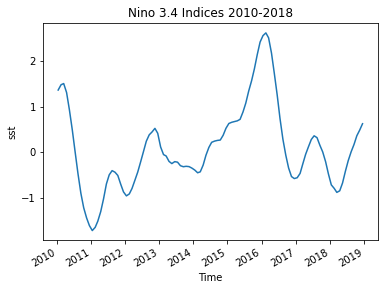

In [ ]:
#the nino targets are the 5 month rolling average of sst
#between 170 degrees west and 120 degrees west and 5 degrees north
#and 5 degrees south
nino_targets = sst_anomalies.sel(lat=slice(5,-5), 
              lon=slice(360-170,360-120)).mean(dim=('lat','lon'))
#take the 5month rolling average
nino_targets = nino_targets.rolling(time=5).mean()

nino_targets['sst'].sel(time=slice("2010-01-01", "2018-12-31")).plot()
plt.title("Nino 3.4 Indices 2010-2018")
plt.show()

# Interview Questions

1.   Please share with us your exploratory data analysis on the input datasets and target datasets.
2.   Please train an ensemble models to forecast the Niño3.4 index, Mexico City temperature, Caracas temperature, and Akron temperature, at lead times of 1, 3, and 5 months. Feel free to use as much of the data described in the "Predictors" section as you'd like. Which models perform the best for these locations?  For each location and lead time, please plot the time series comparing the forecast to the observations.
3.   Using each of the below subsets of data, please train a model to forecast the Niño3.4 index (for a total of four models, one for each subset). How does the performance of models compare?  What do you think is the reason for the difference in performance?
        *   1900-1929 SST data
        *   1980-2009 SST data
        *   1980-2009 2m temperature data
        *   the years 1900-1929 of the CNRM data
        *   the years 1980-2009 of the CNRM data
4.   If you conducted an additional experiment or explored an additional hypothesis that you found interesting, please also feel free to share that with us! Your presentation does not have to be confined to the above 3 questions!

*Please share your notebook with us in advance of the interview.*

Please prepare a 30 minute Powerpoint/ Google Slides presentation to share your results.  We will also have a 15 minute question and answer period afterwards.

We look forward to meeting you soon and going over your results!  Thank you very much for your time!!